# Amazon Top 50 Bestselling Books 2009 - 2019


Data Source: Sooter Saalu, “Amazon Top 50 Bestselling Books 2009 - 2019.” Kaggle, 2020, doi: 10.34740/KAGGLE/DSV/1556647.

*User ratings and reviews are the latest accumulated data, thus not available for analyzing the trend.

## Interesting findings:

1) The average price of the bestsellers have declined in the past 10 years. Fictions cost less than non fictions.

2) Fictions had more reviews than non fictions, and the number of reviews of fictions varied more.

3) Fictions had slightly higher user ratings than non fictions, and the user rating of fictions fluctuated relatively more than non 
   fictions.

4) "Publication Manual of the American Psychological Association, 6th Edition" and "The 5 Love Languages: The Secret to Love      That Lasts" were the only two books which have been the bestsellers for 10 consecutive years.

5) Jeff Kinney has made the most appearances (12 times) in the list. And what's more interesting is, unlike other authors, none    of his books has made second appearance. 12 times 12 different books and from the same series: "Diary of a Wimpy Kid".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\DELLOWEN\\Desktop\\python project\\bestsellers with categories.csv',encoding='latin1')

In [3]:
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


In [4]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


## Features Distribution

In [6]:
sns.set_style('darkgrid')

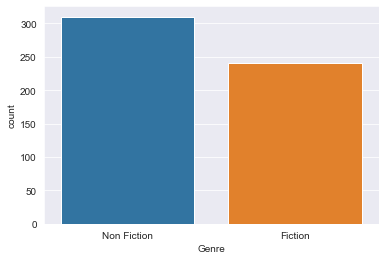

In [7]:
sns.countplot(df['Genre'])

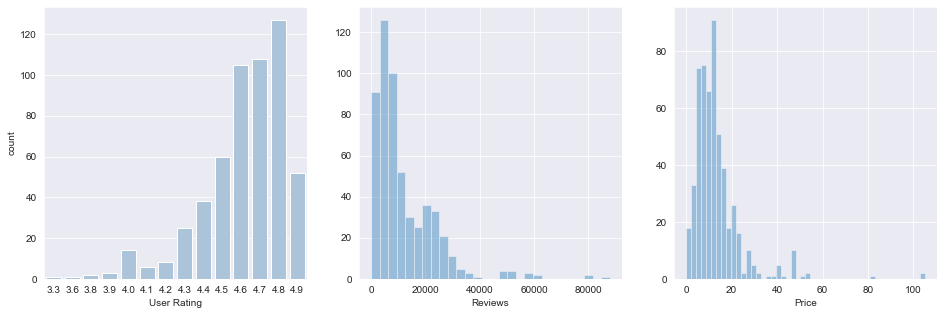

In [8]:
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(df['User Rating'],color='#a5c4e1')
plt.subplot(1,3,2)
sns.distplot(df['Reviews'],kde=False)
plt.subplot(1,3,3)
sns.distplot(df['Price'],kde=False)

## Exploring Correlations

In [9]:
genre = pd.get_dummies(df['Genre'],drop_first=True)
df_converted = pd.concat([df,genre],axis=1)
df_converted.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Non Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1


C:\Users\DELLOWEN\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DELLOWEN\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


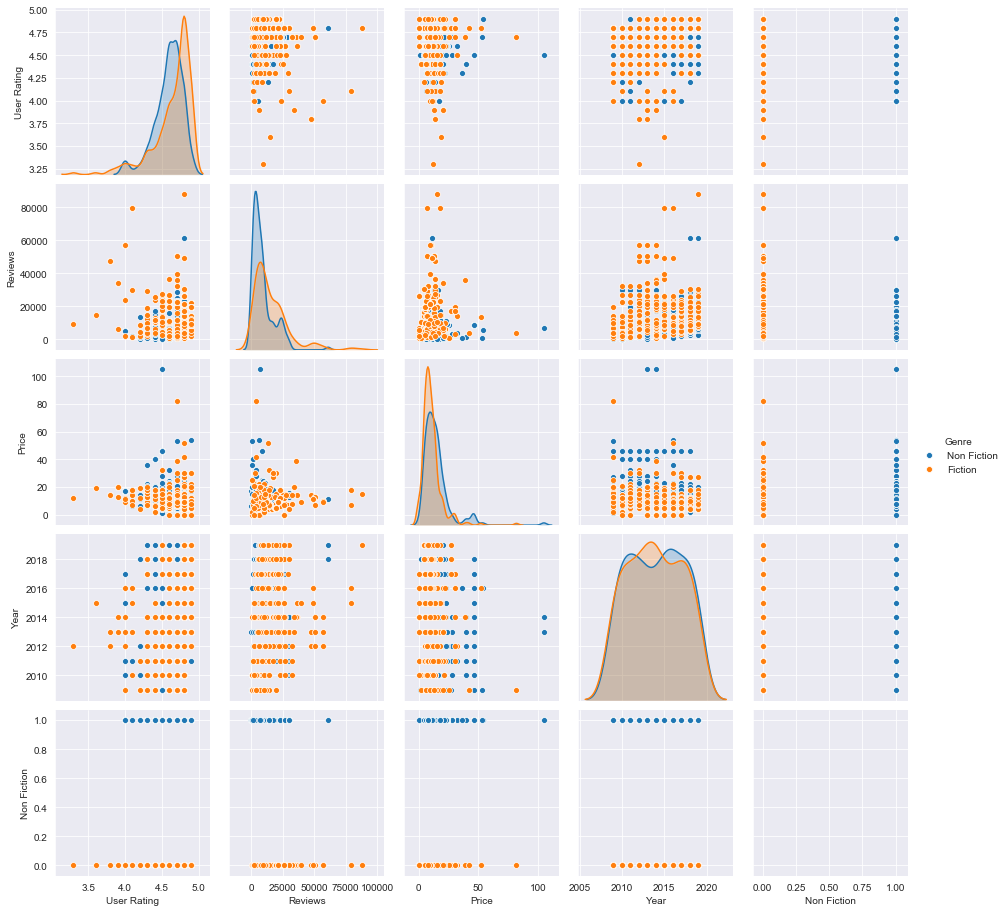

In [10]:
# No linear relationships found, but could identify some patterns. User ratings and reviews of fictions were more scattered than
# non fictions (located at the bottom left corner of the pairplot). The findings were also reflected in the calculation of 
# standard deviation below.

sns.pairplot(df_converted,hue='Genre')

In [11]:
df_converted.corr()

,User Rating,Reviews,Price,Year,Non Fiction
User Rating,1.000000,-0.001729,-0.133086,0.242383,-0.116282
Reviews,-0.001729,1.000000,-0.109182,0.263560,-0.280058
Price,-0.133086,-0.109182,1.000000,-0.153979,0.182761
Year,0.242383,0.263560,-0.153979,1.000000,0.020868
Non Fiction,-0.116282,-0.280058,0.182761,0.020868,1.000000


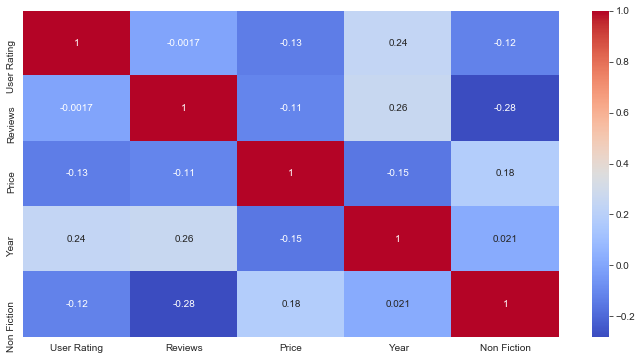

In [12]:
# Heatmap below shows weak correlations, echoing the scatterplot above.
plt.figure(figsize=(12,6))
sns.heatmap(df_converted.corr(),cmap='coolwarm',annot=True)

## Genre Analysis

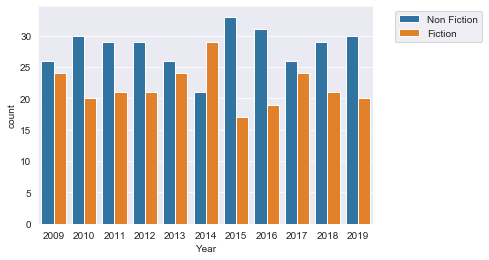

In [13]:
ax = sns.countplot(df['Year'],hue = df['Genre'])
ax.legend(bbox_to_anchor=(1.05, 1),loc='upper left')

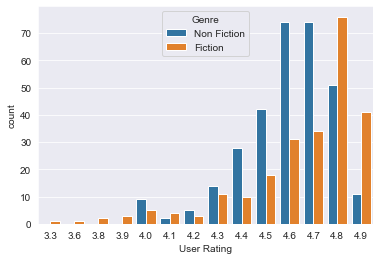

In [14]:
sns.countplot(df['User Rating'],hue = df['Genre'])

In [15]:
# Fictions had more reviews than non fictions, and the number of reviews of fictions varied more (larger standard deviation).
reviews_genre = pd.pivot_table(df, values=['Reviews'],index='Genre',aggfunc={'Reviews':[np.sum, np.mean,np.std,np.max,np.min]})
reviews_genre

Reviews                                              
                amax   amin          mean           std        sum
Genre                                                             
Fiction      87841.0  548.0  15683.791667  13984.120890  3764110.0
Non Fiction  61133.0   37.0   9065.145161   8606.737629  2810195.0

In [16]:
# Fictions had slightly higher user ratings than non fictions, and the user rating of fictions fluctuated relatively more than non 
# fictions (greater standard deviation).
user_rating_genre = pd.pivot_table(df, values=['User Rating'],index='Genre',aggfunc={'User Rating':[np.mean,np.std,np.max,np.min]})
user_rating_genre

User Rating                         
                   amax amin      mean       std
Genre                                           
Fiction             4.9  3.3  4.648333  0.265123
Non Fiction         4.9  4.0  4.595161  0.189555

## Price Trend

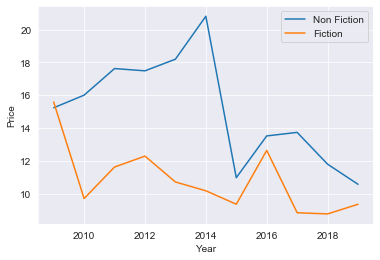

In [17]:
sns.lineplot(x = df['Year'],y = df[df['Genre']=='Non Fiction']['Price'],ci=None,label='Non Fiction')
sns.lineplot(x = df['Year'],y = df[df['Genre']=='Fiction']['Price'],ci=None,label='Fiction')
plt.legend()

## Bestsellers and Authors Analysis

In [18]:
# Bestsellers with most appearances (Top 15)
df['Name'].value_counts().head(15)

The 5 Love Languages: The Secret to Love That Lasts                                  10
Publication Manual of the American Psychological Association, 6th Edition            10
StrengthsFinder 2.0                                                                   9
Oh, the Places You'll Go!                                                             8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change          7
The Very Hungry Caterpillar                                                           7
The Four Agreements: A Practical Guide to Personal Freedom (A Toltec Wisdom Book)     6
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)             6
The Five Dysfunctions of a Team: A Leadership Fable                                   5
First 100 Words                                                                       5
The Official SAT Study Guide                                                          5
Laugh-Out-Loud Jokes for Kids   

In [19]:
# Authors with most appearances (Top 15)
df['Author'].value_counts().head(15)

Jeff Kinney                           12
Gary Chapman                          11
Suzanne Collins                       11
Rick Riordan                          11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              9
J.K. Rowling                           8
Rob Elliott                            8
Bill O'Reilly                          7
Dav Pilkey                             7
Eric Carle                             7
Stephen R. Covey                       7
Stephenie Meyer                        7
Sarah Young                            6
Name: Author, dtype: int64

In [20]:
# Jeff Kinney's bestsellers
df[df['Author']=='Jeff Kinney'].sort_values(by='Year')

,Name,Author,User Rating,Reviews,Price,Year,Genre
72,Diary of a Wimpy Kid: The Last Straw (Book 3),Jeff Kinney,4.8,3837,15,2009,Fiction
80,"Dog Days (Diary of a Wimpy Kid, Book 4) (Volum...",Jeff Kinney,4.8,3181,12,2009,Fiction
474,"The Ugly Truth (Diary of a Wimpy Kid, Book 5)",Jeff Kinney,4.8,3796,12,2010,Fiction
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
468,"The Third Wheel (Diary of a Wimpy Kid, Book 7)",Jeff Kinney,4.7,6377,7,2012,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
73,Diary of a Wimpy Kid: The Long Haul,Jeff Kinney,4.8,6540,22,2014,Fiction
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
88,Double Down (Diary of a Wimpy Kid #11),Jeff Kinney,4.8,5118,20,2016,Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction


In [21]:
# Books with the highest rating
df[df['User Rating']==df['User Rating'].max()].sort_values(by='Author')

,Name,Author,User Rating,Reviews,Price,Year,Genre
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
174,Humans of New York : Stories,Brandon Stanton,4.9,2812,17,2015,Non Fiction
431,The Magnolia Story,Chip Gaines,4.9,7861,5,2016,Non Fiction
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction


In [22]:
# The book with the lowest rating
df[df['User Rating']==df['User Rating'].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
353,The Casual Vacancy,J.K. Rowling,3.3,9372,12,2012,Fiction


In [23]:
# The Bestseller with the largest amount of reviews
df[df['Reviews']==df['Reviews'].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [24]:
# The Bestseller with the smallest amount of reviews
df[df['Reviews']==df['Reviews'].min()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
78,Divine Soul Mind Body Healing and Transmission...,Zhi Gang Sha,4.6,37,6,2009,Non Fiction
